In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

In [2]:
youtube = pd.read_csv('USvideos.csv')

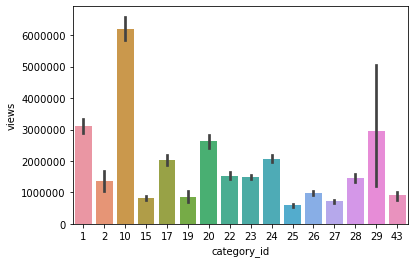

In [3]:
sns.barplot(data=youtube, x ='category_id', y='views')


# Question

#### Saya pernah membaca bahwa Trend video juga tergantung kategori, jika kita barplot kan category 10 dan 29 memiliki mean yang tertinggi (walau mean dari 29 besar jaraknya) berarti mereka menarik banyak view. Tetapi apakah mereka berbeda secara view, like, dan dislikesnya?


In [4]:
from scipy.stats import shapiro,normaltest, anderson
def trynormal(data):
    result={'Anderson':{i:j for i,j in zip(anderson(data)[2],anderson(data)[1])}, 'shapiro' : shapiro(data)[1],'k^2' : normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [5]:
trynormal(youtube[(youtube['category_id'] == 10 )]['likes'])

C:\Users\Sabam-Mr\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning:

p-value may not be accurate for N > 5000.



{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1059.63100476604},
 'shapiro': 0.0,
 'k^2': 0.0}

In [6]:
trynormal(youtube[(youtube['category_id'] == 29 )]['likes'])

{'Anderson': {15.0: 0.542,
  10.0: 0.617,
  5.0: 0.741,
  2.5: 0.864,
  1.0: 1.028,
  'stat': 15.770348198612865},
 'shapiro': 2.335269564529563e-13,
 'k^2': 4.61018340359511e-08}

In [7]:
# Nilai Shapiro < Nilai alpha ( 5 %)
# 2.335269564529563e-13 < 0.741
# menandatakan data tidak berdistribusi normal

In [8]:
trynormal(youtube[(youtube['category_id'] == 10 )]['dislikes'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1398.5780660629043},
 'shapiro': 0.0,
 'k^2': 0.0}

In [9]:
# Nilai Shapiro < Nilai alpha ( 5 %)
# 0.0 < 0.787
# menandatakan data tidak berdistribusi normal

In [10]:
trynormal(youtube[(youtube['category_id'] == 29 )]['dislikes'])

{'Anderson': {15.0: 0.542,
  10.0: 0.617,
  5.0: 0.741,
  2.5: 0.864,
  1.0: 1.028,
  'stat': 15.941865855475612},
 'shapiro': 1.6795371788214802e-13,
 'k^2': 5.222212259578384e-09}

In [11]:
# Nilai Shapiro < Nilai alpha ( 5 %)
# 0.0 < 0.741
# menandatakan data tidak berdistribusi normal

In [12]:
trynormal(youtube[(youtube['category_id'] == 10 )]['views'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1190.1770512259227},
 'shapiro': 0.0,
 'k^2': 0.0}

In [13]:
# Nilai Shapiro < Nilai alpha ( 5 %)
# 0.0 < 0.787
# menandatakan data tidak berdistribusi normal

In [14]:
trynormal(youtube[(youtube['category_id'] == 29 )]['views'])

{'Anderson': {15.0: 0.542,
  10.0: 0.617,
  5.0: 0.741,
  2.5: 0.864,
  1.0: 1.028,
  'stat': 15.03917848327174},
 'shapiro': 3.174725022800362e-13,
 'k^2': 7.110325304841888e-09}

In [15]:
from scipy.stats import mannwhitneyu
result = list(mannwhitneyu(youtube[youtube['category_id'] == 29]['likes'],
                          youtube[youtube['category_id'] == 10]['likes']))
print('U-Statistic:',result[0])
print('P-Value:',result[1])

U-Statistic: 81875.0
P-Value: 2.2471001015367116e-13


In [16]:
# p value < 0,05 maka tolak hipotesis nol (H0).artinya terdapat perbedaan antara nilai category_id dan likes 

In [17]:
from scipy.stats import mannwhitneyu
result = list(mannwhitneyu(youtube[youtube['category_id'] == 29]['dislikes'],
                          youtube[youtube['category_id'] == 10]['dislikes']))
print('U-Statistic:',result[0])
print('P-Value:',result[1])

U-Statistic: 91647.5
P-Value: 2.876019645817286e-11


In [18]:
# p value < 0,05 maka tolak hipotesis nol (H0).artinya terdapat perbedaan antara nilai category_id dan dislikes 

In [19]:
from scipy.stats import mannwhitneyu
result = list(mannwhitneyu(youtube[youtube['category_id']== 29]['views'],
                          youtube[youtube['category_id'] == 10]['views']))
print('U-Statistic:',result[0])
print('P-Value:',result[1])

U-Statistic: 78978.5
P-Value: 4.876291818247057e-14


In [20]:
# p value < 0,05 maka tolak hipotesis nol (H0).artinya terdapat perbedaan antara nilai category_id dan views 

# Anova Test

## Anova utk parametrik & Uji Equal Variance
### Utk menguji 2 group mean atau lebih



In [ ]:
# Asumsi Anova tidak ada perbeedan varians

In [25]:
youtube_10 = youtube[(youtube['category_id'] == 10 )]
youtube_29 = youtube[(youtube['category_id'] == 29 )]
youtube_20 = youtube[(youtube['category_id'] == 20 )]

In [24]:
from scipy.stats import levene, bartlett, f_oneway, kruskal

def try_equal_var(x1,x2):
    result = {'Bartlett':{'Bartlett-Stat': bartlett(x1,x2)[0],'P-Value': bartlett(x1,x2)[1]},
             'Levene':{'Levene-Stat': levene(x1,x2)[0], 'P-Value': levene(x1,x2)[1]}}
    return result
try_equal_var(youtube_10['views'],youtube_29['views'])

{'Bartlett': {'Bartlett-Stat': 42.17774401543469,
  'P-Value': 8.334313062671943e-11},
 'Levene': {'Levene-Stat': 1.8972437360796675, 'P-Value': 0.16843438710372255}}

In [26]:
f_oneway(youtube_10['views'], youtube_29['views'],youtube_20['views'])

F_onewayResult(statistic=22.988823625140867, pvalue=1.1148274978350597e-10)

In [30]:
from pingouin import welch_anova

In [31]:
youtube_10_20_29 = youtube[(youtube['category_id'] == 10 ) | (youtube['category_id'] == 20 )|(youtube['category_id'] == 29 )]
welch_anova(data=youtube_10_20_29, dv='views', between = 'category_id')

,Source,ddof1,ddof2,F,p-unc
0,category_id,2,150.976,129.873,1.548307e-33


In [35]:
from pingouin import pairwise_gameshowell, pairwise_tukey

In [33]:
pairwise_gameshowell(data= youtube_10_20_29, dv='views', between='category_id')

,A,B,mean(A),mean(B),diff,se,tail,T,df,pval,hedges
0,10,20,6201003.12,2620830.63,3580172.489,156832.668,two-sided,16.142,6125.549,0.001000,0.599
1,10,29,6201003.12,2963884.07,3237119.049,681572.891,two-sided,3.358,60.731,0.002461,0.447
2,20,29,2620830.63,2963884.07,-343053.440,672464.548,two-sided,-0.361,57.549,0.900000,-0.049


In [ ]:
# h0 yg diterima cuma 10 dan 20, krn p vall < 0.05
# Digunakan jika data equal variance

In [36]:
pairwise_tukey(data= youtube_10_20_29, dv='views', between='category_id')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,10,20,6201003.12,2620830.63,3580172.489,540755.504,two-sided,6.621,0.001000,0.246
1,10,29,6201003.12,2963884.07,3237119.049,1937599.027,two-sided,1.671,0.216797,0.222
2,20,29,2620830.63,2963884.07,-343053.440,1995283.062,two-sided,-0.172,0.900000,-0.024


In [37]:
# h0 yg ditolak 10 dan 29 , krn p-tukey > 0.05
# Digunakan jika data tidak equal variance

### Uji Non parametrik

In [38]:
# Utk membandingkan 3 atau lebih
# ho adalah median kalau di kruskal, statistiknya berdasarkan rangking 
# 
kruskal(youtube_10['views'], youtube_29['views'], youtube_20['views'])

KruskalResult(statistic=57.21993458049006, pvalue=3.757068198005064e-13)

In [ ]:
# populasi median tdk sama
# nilai p value artinya ada perbedaaan

In [40]:
from pingouin import pairwise_ttests

In [41]:
pairwise_ttests(data=youtube_10_20_29, dv='views', between='category_id',parametric=False)

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
0,category_id,10,20,False,False,2721072.5,two-sided,1.728277e-01,0.245
1,category_id,10,29,False,False,289925.5,two-sided,9.752584e-14,0.210
2,category_id,20,29,False,False,36507.5,two-sided,7.204730e-13,-0.096


In [ ]:
# Utk melihat perbedaannya, normalnya di paired. berarti 10 & 20 tdk berbeda karena p-unc = 0,17 > 0.05, ho di accept karena tdk ada perbedaan
# kurkal mengasumsikan variance karena median
# bisanya non parametik ga liat means
# Perbandingannya pakai mann whitney
# z Scrore adalah outlier/ data yg extrem
# pakai z score utk merubah angka bukan distribusi